# Polynomial Regression

Most of this code is pulled from my ordinary least squares. Just modified for non-lineararity.

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
# Data
n = 200

X0 = np.array([[1] * n])
X1 = (4) * np.random.rand(n)[np.newaxis] - 2 # gives values [-2, 2)
X2 = X1 ** 2
X3 = X1 ** 3 

X = np.array([X0[0], X1[0], X2[0], X3[0]])

# Cool trick Percy Liang used during one of his lectures for CS221. It 
# generates fake Y values and if the program works then w and b will converge
# to whatever you set these values too.
artificial_weights = np.array([[3], [2], [1], [-1]])

noise = np.random.rand(n)
Y = np.dot(artificial_weights.T, X) + (noise / 5.0)

In [7]:
def hypothesis(w, x):
    return np.dot(w.T, x) 

def train(w, x, y):
    print("x: {}".format(np.shape(x)))
    print("y: {}".format(np.shape(y)))
    print("w: {}".format(np.shape(w)))

    for i in range(10000):
        h = hypothesis(w, x)

        w = w - ( 0.01 * (2.0 * np.dot(x, (h - y).T) / 200.0))

#        print("w: {}".format(w))
        
    return w 

In [8]:
w_init = np.array([[0], [0], [0], [0]])
w = train(w_init, X, Y)
print(w)




x: (4, 200)
y: (1, 200)
w: (4, 1)
[[ 3.09421612]
 [ 2.03038808]
 [ 1.00463199]
 [-1.00993401]]


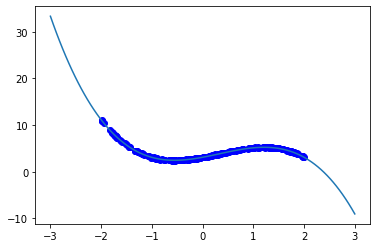

In [6]:
# Plotting

plt.scatter(X[1], Y, color="blue")
#x = np.linspace(-2, 2, 2)
x = np.linspace(-3, 3, num=100)
#hyperplane = w[0] * x + b[0]

w_0 = w[0]
w_1 = w[1]
w_2 = w[2]
w_3 = w[3]

# Got this idea from - https://aadhil-imam.medium.com/plotting-polynomial-function-in-python-361230a1e400
fx=[]
for i in range(len(x)):
    fx.append(w_3*x[i]**3 + w_2*x[i]**2 + w_1*x[i] + w_0)

plt.plot(x, fx)

#plt.plot(x, hyperplane, '-', color="red")

plt.show()
